# P2 - Regresión Lineal
Hecho por:
- Jaime Benedi
- Miguel Sevilla

En una secuencia de tiempo de 1 minuto, tenemos una pulsera inteligente que mide la frecuencia
cardiaca (FC). Nos gustaría saber cuál es la regresión lineal de dichos pares tiempo y FC para saber en
qué medida están incrementando los valores o disminuyendo.
El primer paso será generar los datos realistas a partir de un coeficiente y una variación aleatoria. Para
ello, se debe generar un array “x” con los instantes de tiempos (i.e. de 1 a 60, representando los
segundos de un minuto) y un array “y” con las frecuencias cardiacas para dichos tiempos. Por ejemplo,
podrías usar la siguiente fórmula, pero también es bueno que pruebas con otras fórmulas:
Y = 0.7*x + 60 + <número aleatorio entre -5.9 y +5.9>
Para generar “x” puedes usar función “arange(inicio, fin)” de “numpy”. Para generar “y” puedes usar
operaciones matemáticas sobre array y la operación “random.uniform(inicio, fin)” para generar los
números aleatorios. Se puede implementar en un método llamado “generarDatosFC” que devuelva
una secuencia “x, y”.
El segundo paso será implementar una función que realice toda esta parte de la práctica: que tome
estos datos generados y que haga lo siguiente.
- Adaptar los datos de entrada X para la entrada LinearRegression. En la x, se necesita [[1],
[2], …] en vez de [1, 2, …]. Se puede hacer con las “List Comprehensions”.
- Obtener el coeficiente de la función lineal aprendida y la parte independiente (i.e.
intercept), y mostrarlos por pantalla.
- Obener los datos “y” (e.g. “yLinealResult”) de la función lineal aprendida.
- Usar Matplotlib para mostrar los puntos de mediciones de FC generados y la función lineal
aprendida.
Un ejemplo de salida podría ser lo siguiente:
Coefficients: [0.70915241] Intercept:
59.47330187403128
Se observará en qué medida se puede estimar
apropiadamente la regresión lineal, comparando
los valores usados para la generación y los valores
aprendidos en la regresión lineal.
Explora otras cualidades de LinearRegression y
comenta los atributos que más te han llamado la
atención

## Librerías a usar

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## Generación de datos

In [12]:
def example1FC(x:np.ndarray) -> np.ndarray:
    return 0.7*x + 60 + np.random.normal(0, 5, x.size)

In [13]:
def generarDatosFC(minTiempo : float, maxTiempo : float, func) -> tuple[np.ndarray, np.ndarray] :
    x = np.arange(minTiempo, maxTiempo)
    return x, func(x)

In [14]:
x, y = generarDatosFC(1, 60, example1FC)
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59]
[ 62.27532506  54.4184528   66.73274956  54.83706878  61.44761337
  58.66934868  64.56141871  57.62245333  59.97261236  70.47110209
  72.96044768  59.37020787  61.91478285  63.48994272  72.13698553
  68.93909565  81.2272425   67.18802657  70.85816233  74.28433331
  74.60799432  70.60676091  70.01360832  88.14029621  78.23910191
  73.45930938  79.63707475  81.82727301  81.34510045  81.10102623
  87.31372544  77.9742145   85.59145427  84.81877103  86.11975868
  90.42591455  79.3749282   78.65271658  88.46817084  90.81096449
  92.49506506  99.3788442   98.11361934  86.98455267  91.86204574
  92.65186564  89.85547528  99.00801505 102.00210757  92.49540096
  81.96076562  91.91811289  96.25755911  99.63453452 103.20423243
  94.71790428  92.33085856 100.48734761 102.45982224]


In [15]:
xEnlisted = [[i] for i in x]
print(xEnlisted)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59]]


## Regresión Lineal

In [16]:
modelo = LinearRegression()
modelo.fit(xEnlisted, y)
modelo.intercept_, modelo.coef_
print("Coeficiente de la función lineal: ", modelo.coef_)
print("Ordenada al origen: ", modelo.intercept_)
print("R^2: ", modelo.score(xEnlisted, y))

Coeficiente de la función lineal:  [0.74400548]
Ordenada al origen:  58.01413488173558
R^2:  0.8561938977302324


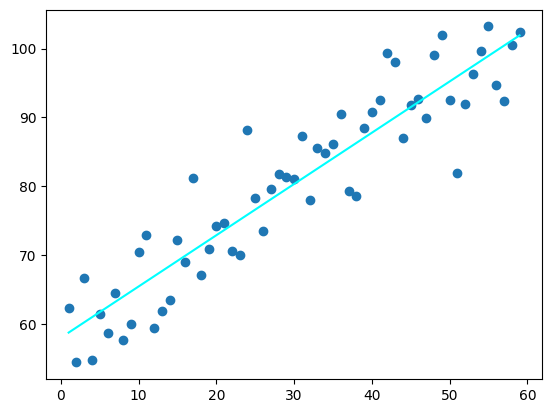

In [18]:
yLinealResultado = modelo.predict(xEnlisted)
plt.scatter(x, y)
plt.plot(x, yLinealResultado, color='cyan')
plt.show()